In [1]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 150

In [2]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_3/Half-Plate only'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [3]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0][0::100])))
    V1.append(Data[:, 1][0::100]) 

Just to look at the data how they look if there is not made a fit

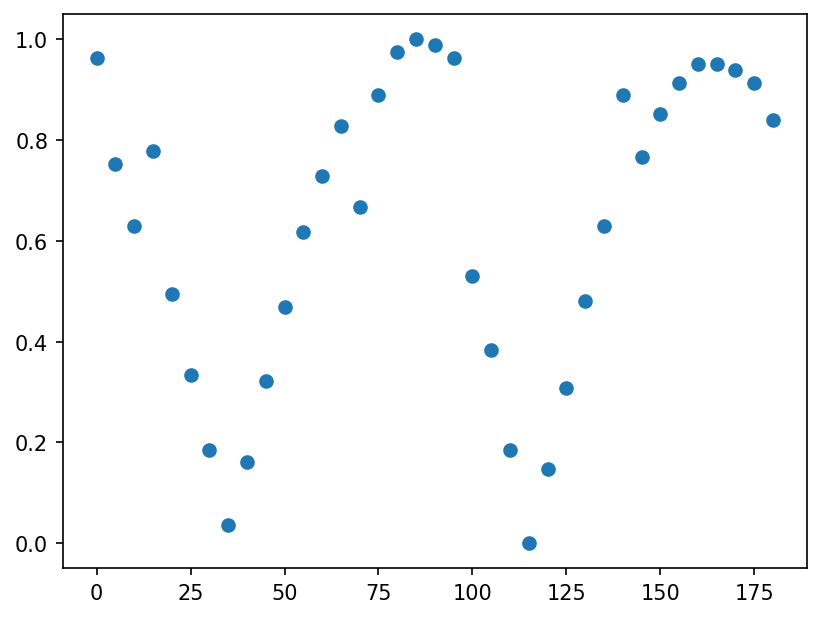

In [4]:
amplitudes = np.array([(max(v) - min(v))/2 for v in V1])
amp_err = [np.sqrt(1/2) * 0.078] * len(amplitudes)
amplitudes = (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min())
angles = np.linspace(0, 180, 37)
plt.plot(angles, (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min()), 'o')

Text(0.5, 1.0, 'Amplitude of Laser at different Half-Plate angles')

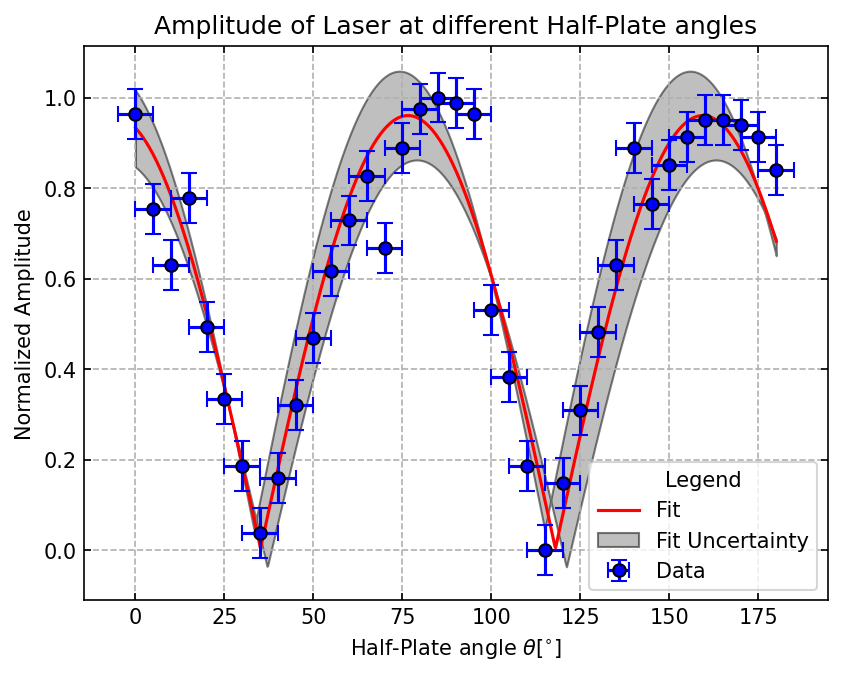

In [5]:
def amp_fit(theta, *p):
    c = p[0]
    a = p[1]
    b = p[2]
    d = p[3]
    return c * abs(np.cos(a * theta + b)) + d

p0 = [1, 0.03, 1.7, 0]
p_opt, p_cov = sc.curve_fit(amp_fit, angles, amplitudes, p0 = p0)

angles_help = np.linspace(0, 180, 1000)
paramter_err = np.sqrt(np.diag(p_cov))

plt.plot(angles_help, amp_fit(angles_help, *p_opt), color = 'red', label = 'Fit')
# plt.plot(angles_help, amp_fit(angles_help, *p0))
plt.errorbar(angles, amplitudes, yerr = amp_err, xerr = 5, fmt = 'o', capsize = 4, color = 'blue', label = 'Data', markeredgecolor = 'k')
plt.fill_between(angles_help, amp_fit(angles_help, p_opt[0] + np.sqrt(p_cov[0][0]), p_opt[1] + np.sqrt(p_cov[1][1]), p_opt[2] + np.sqrt(p_cov[2][2]),
                                        p_opt[3] + np.sqrt(p_cov[3][3])), amp_fit(angles_help, p_opt[0] - np.sqrt(p_cov[0][0]), p_opt[1] - np.sqrt(p_cov[1][1]), 
                                        p_opt[2] - np.sqrt(p_cov[2][2]), p_opt[3] - np.sqrt(p_cov[3][3])), color = 'grey', edgecolor = 'k', alpha = 0.5,
                                        label = 'Fit Uncertainty')

plt.legend(title = 'Legend')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', right = True, top = True)
plt.xlabel(r'Half-Plate angle $\theta [^{\circ}]$')
plt.ylabel(r'Normalized Amplitude')
plt.title('Amplitude of Laser at different Half-Plate angles')

In [6]:
for i, parameter in enumerate(p_opt):
    print(f'{round(parameter, 3)} \\pm {round(np.sqrt(np.diag(p_cov)[i]), 3)}')

0.957 \pm 0.057
0.038 \pm 0.001
0.239 \pm 0.052
0.004 \pm 0.041


<BarContainer object of 37 artists>

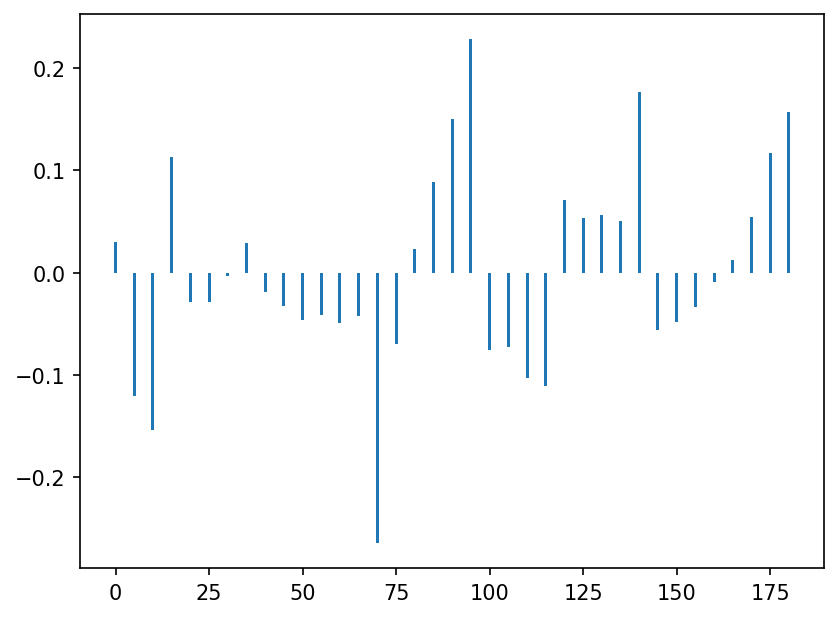

In [7]:
resid_amp = [amp - amp_fit(angles[i], *p_opt) for i, amp in enumerate(amplitudes)]

plt.bar(angles, resid_amp)

In [8]:
expected = amp_fit(angles, *p_opt)
import scipy.stats as ss


chmin = np.sum(((amplitudes - expected)/amp_err)**2)
p_value = ss.chi2.sf(chmin, len(amplitudes)-1)
chmin

114.13568452800128

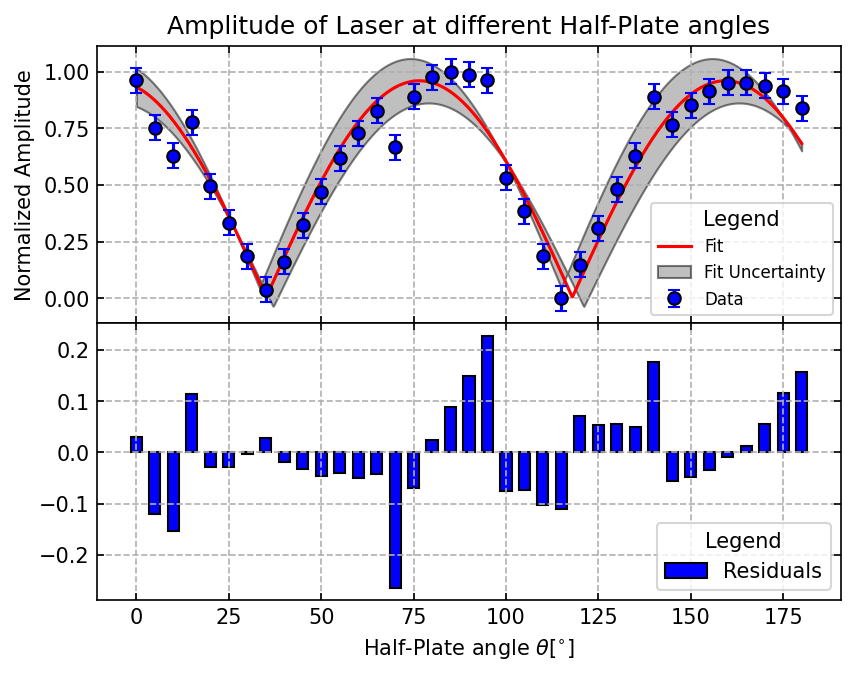

In [9]:
figure, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

# Data and fit:
ax1.plot(angles_help, amp_fit(angles_help, *p_opt), color = 'red', label = 'Fit')
# plt.plot(angles_help, amp_fit(angles_help, *p0))
ax1.errorbar(angles, amplitudes, yerr = amp_err, fmt = 'o', capsize = 3, color = 'blue', label = 'Data', markeredgecolor = 'k')
ax1.fill_between(angles_help, amp_fit(angles_help, p_opt[0] + np.sqrt(p_cov[0][0]), p_opt[1] + np.sqrt(p_cov[1][1]), p_opt[2] + np.sqrt(p_cov[2][2]),
                                        p_opt[3] + np.sqrt(p_cov[3][3])), amp_fit(angles_help, p_opt[0] - np.sqrt(p_cov[0][0]), p_opt[1] - np.sqrt(p_cov[1][1]), 
                                        p_opt[2] - np.sqrt(p_cov[2][2]), p_opt[3] - np.sqrt(p_cov[3][3])), color = 'grey', edgecolor = 'k', alpha = 0.5,
                                        label = 'Fit Uncertainty')

ax1.legend(title = 'Legend', fontsize = 8)
ax1.grid(ls = '--')
ax1.tick_params(direction = 'in', right = True, top = True)
ax1.set_ylabel(r'Normalized Amplitude')
ax1.set_title('Amplitude of Laser at different Half-Plate angles')

# Plot residual:
ax2.grid(ls = '--')
ax2.bar(angles, resid_amp, color = 'blue', width = 3, edgecolor = 'k', label = 'Residuals')
ax2.legend(title = 'Legend')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.set_xlabel(r'Half-Plate angle $\theta [^{\circ}]$')


plt.subplots_adjust(hspace=0)

In [10]:
peaks_max = np.array([angles[0], angles[17], angles[32]])
peaks_min = np.array([angles[7], angles[23]])

amps_half = np.array([amplitudes[0], amplitudes[17], amplitudes[32]])

print(peaks_max)
print(peaks_min)
print(amps_half)
angles

[  0.  85. 160.]
[ 35. 115.]
[0.96293902 1.         0.95062592]


array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180.])